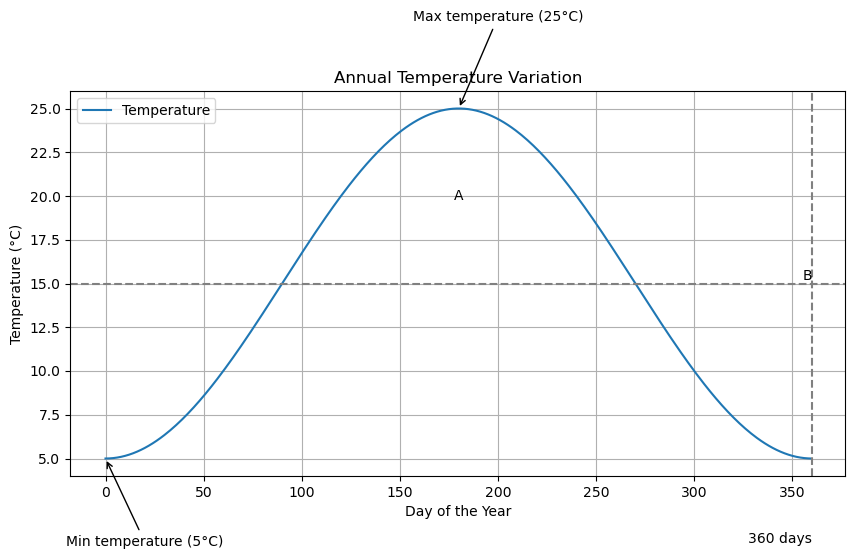

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(A, B, days):
    """生成基于余弦波的年度温度变化"""
    t = np.arange(days)
    return -A * np.cos(2 * np.pi * t / days) + B

# 温度振幅和平均温度
A = 10  # 温度振幅
B = 15  # 平均温度

# 生成一年的温度数据
T = generate_annual_temperatures(A, B, 360)

# 绘图
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.arange(360), T, label='Temperature')
ax.annotate(f'Max temperature ({B+A}°C)', xy=(180, B + A), xytext=(200, B + A + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
ax.annotate(f'Min temperature ({B-A}°C)', xy=(0, B - A), xytext=(20, B - A - 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
ax.axhline(y=B, color='gray', linestyle='--')
ax.text(360, B, 'B', verticalalignment='bottom', horizontalalignment='right')
ax.text(180, B + A/2, 'A', verticalalignment='center', horizontalalignment='center')

ax.axvline(x=360, color='gray', linestyle='--')
ax.text(360, B - 15, '360 days', verticalalignment='bottom', horizontalalignment='right')

ax.set_title('Annual Temperature Variation')
ax.set_xlabel('Day of the Year')
ax.set_ylabel('Temperature (°C)')

ax.grid(True)

ax.legend()
plt.show()


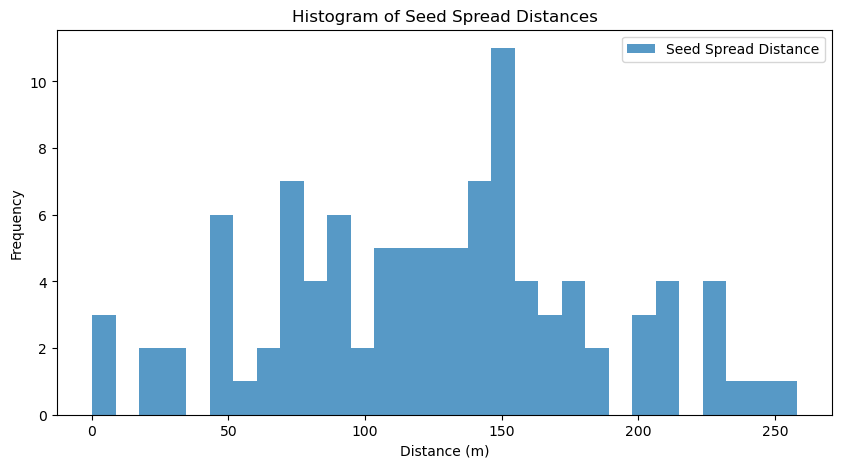

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_b():
    """ 根据给定的条件计算b的值 """
    # P(sL > 10) = 0.5% => P(sL <= 10) = 1 - 0.5% = 0.995
    # 解 0.995 = 1 - e^(-b * 10)
    b = -np.log(1 - 0.995) / 10
    return b

def generate_wind_speed(n, mean=5, std=2):
    """ 生成正态分布的水平风速数据 """
    return np.random.normal(mean, std, n)

def calculate_normal_distance(h, vh, vv=0.4):
    """ 计算正常散布距离sN """
    return (h / vv) * vh

def simulate_long_distance(n, b):
    """ 根据指数分布模拟长距离sL """
    return np.random.exponential(1/b, n)

def simulate_seed_spread(n, h=10):
    """ 模拟n个种子的散布，h为绒球的高度，假设固定为10米 """
    b = calculate_b()  # 计算b值
    vh = generate_wind_speed(n)  # 水平风速
    sN = calculate_normal_distance(h, vh)  # 正常散布距离
    sL = simulate_long_distance(n, b)  # 长距离散布
    
    # 取正常距离和长距离中的较大值
    actual_distances = np.maximum(sN, sL)
    
    return actual_distances

# 模拟100个种子的散布
n = 100
distances = simulate_seed_spread(n)

plt.figure(figsize=(10, 5))
plt.hist(distances, bins=30, alpha=0.75, label='Seed Spread Distance')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Seed Spread Distances')
plt.legend()
plt.show()


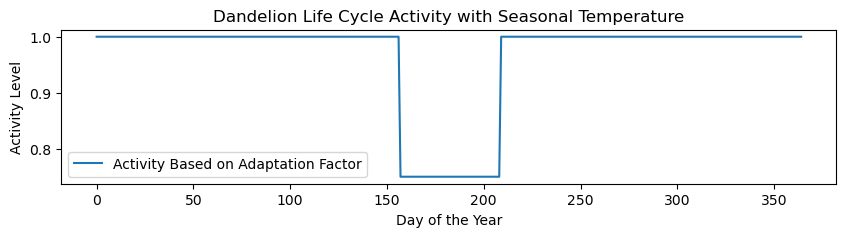

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(A, B, days):
    """Generate annual temperature variations using a cosine wave."""
    t = np.arange(days)
    return -A * np.cos(2 * np.pi * t / days) + B

def adaptation_factor(T, T_optimal_min=10, T_optimal_max=20, T_max=25):
    """Calculate adaptation factor based on temperature, incorporating optimal and maximum temperature ranges."""
    if T < T_optimal_min or T > T_max:
        return 0
    elif T > T_optimal_max:
        # Reduce adaptation factor linearly from optimal max to max temperature
        return 1 - (T - T_optimal_max) / (T_max - T_optimal_max)
    else:
        # Optimal growth conditions
        return 1

def simulate_life_cycle(days, T_data, T_worst=0, T_best=24):
    """Simulate the life cycle of dandelions based on daily temperature data."""
    active_stage = np.zeros(days)
    for day in range(days):
        T = T_data[day]
        k = adaptation_factor(T, T_worst, T_best)
        if T < 0:
            active_stage[day] = 0  # Dormancy
        elif T > 24:
            active_stage[day] = 0.75  # Maintain state
        else:
            active_stage[day] = k  # Active growth based on adaptation factor
    return active_stage

# Parameters for temperature simulation
A = 10  # Temperature amplitude
B = 15  # Average temperature
days = 365  # Number of days in a year

# Generate temperature data
T_data = generate_annual_temperatures(A, B, days)

# Simulate dandelion life cycle
activity = simulate_life_cycle(days, T_data)

# Plot the simulation results
plt.figure(figsize=(10, 2))
plt.plot(activity, label='Activity Based on Adaptation Factor')
plt.xlabel('Day of the Year')
plt.ylabel('Activity Level')
plt.title('Dandelion Life Cycle Activity with Seasonal Temperature')
plt.legend()
plt.show()


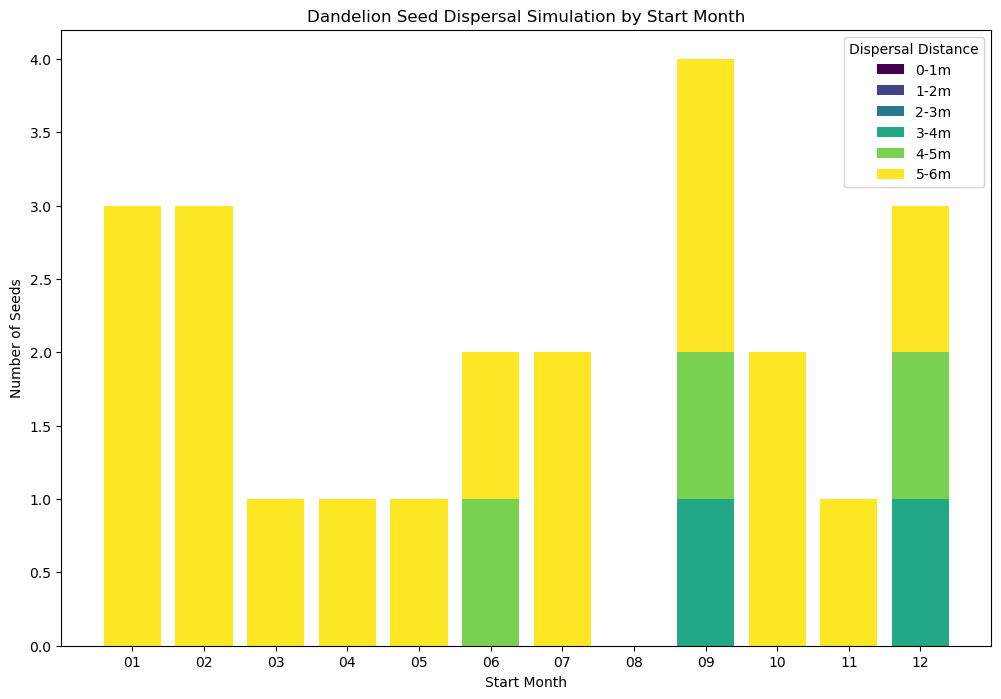

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 环境参数，从表格中抽取
environments = {
    "AK": {"muT": -0.05, "sigmaT": 9.08, "muW": 7.27, "sigmaW": 1.42, "muH": 81.46},
    "CA": {"muT": 16.20, "sigmaT": 4.99, "muW": 6.02, "sigmaW": 0.90, "muH": 80.36},
}

def generate_daily_temperatures(muT, sigmaT, days):
    """生成每天的温度"""
    return np.random.normal(muT, sigmaT, days)

def adaptation_factor(T, T_optimal_min=10, T_optimal_max=20, T_max=25):
    """Calculate adaptation factor based on temperature, incorporating optimal and maximum temperature ranges."""
    if T < T_optimal_min or T > T_max:
        return 0
    elif T > T_optimal_max:
        # Reduce adaptation factor linearly from optimal max to max temperature
        return 1 - (T - T_optimal_max) / (T_max - T_optimal_max)
    else:
        # Optimal growth conditions
        return 1

def simulate_dispersal(muW, sigmaW):
    """模拟种子的散布距离，假设为正态分布"""
    return np.abs(np.random.normal(muW, sigmaW))

def simulate_life_cycle(start_month, env_data):
    """模拟蒲公英的生命周期和种子散布"""
    days = 360  # 模拟一年
    T_data = generate_daily_temperatures(env_data['muT'], env_data['sigmaT'], days)
    dispersal_data = []
    for day, T in enumerate(T_data):
        month = (start_month + day // 30) % 12
        if month == 0: month = 12
        k = calculate_adaptation_factor(T)
        if k > 0.75:
            dispersal = simulate_dispersal(env_data['muW'], env_data['sigmaW'])
            dispersal_data.append((month, dispersal))
    return dispersal_data

# 收集每月开始的模拟数据
all_data = {month: [] for month in range(1, 13)}
for month in range(1, 13):
    data = simulate_life_cycle(month, environments['AK'])
    for m, dispersal in data:
        all_data[m].append(dispersal)

# 绘图
fig, ax1 = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, 6))
bins = [0, 1, 2, 3, 4, 5, 6]
bin_labels = ['0-1m', '1-2m', '2-3m', '3-4m', '4-5m', '5-6m']

# 堆叠条形图
for i, bin_label in enumerate(bin_labels):
    month_data = [np.sum((np.array(all_data[month]) > bins[i]) & (np.array(all_data[month]) <= bins[i+1])) for month in range(1, 13)]
    if i == 0:
        ax1.bar(range(1, 13), month_data, color=colors[i], label=bin_label)
        previous_data = month_data
    else:
        ax1.bar(range(1, 13), month_data, bottom=previous_data, color=colors[i], label=bin_label)
        previous_data = [sum(x) for x in zip(previous_data, month_data)]

ax1.set_xlabel('Start Month')
ax1.set_ylabel('Number of Seeds')
ax1.set_title('Dandelion Seed Dispersal Simulation by Start Month')
ax1.legend(title='Dispersal Distance')
plt.xticks(range(1, 13), [f'{month:02d}' for month in range(1, 13)])
plt.show()


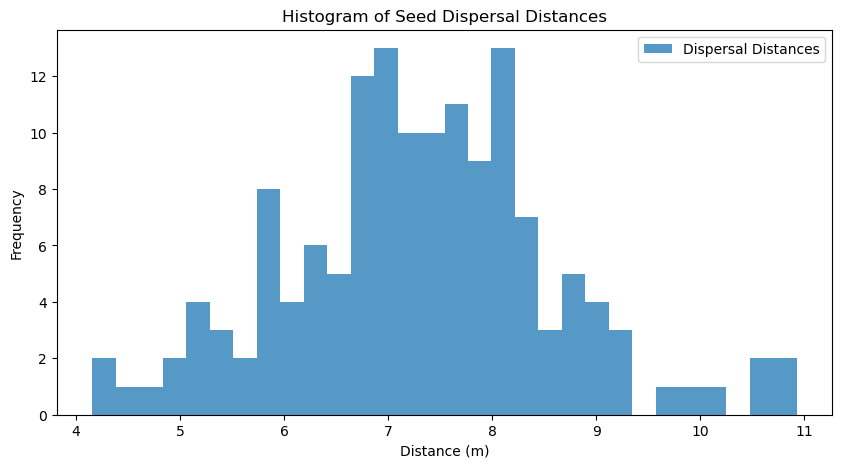

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(A, B, days):
    """生成基于余弦波的年度温度变化"""
    t = np.arange(days)
    return -A * np.cos(2 * np.pi * t / days) + B

def simulate_dispersal(muW, sigmaW):
    """模拟种子的散布距离，假设为正态分布"""
    return np.abs(np.random.normal(muW, sigmaW))

def calculate_adaptation_factor(T, T_best=24, T_worst=0):
    """计算适应因子k"""
    return np.clip((T - T_worst) / (T_best - T_worst), 0, 1)

def simulate_life_cycle(A, B, muW, sigmaW, days=360):
    """模拟蒲公英的生命周期和种子散布，从特定月份开始"""
    T_data = generate_annual_temperatures(A, B, days)
    dispersal_data = []
    for T in T_data:
        k = calculate_adaptation_factor(T)
        if k > 0.75:  # 假设在较高的适应因子时才散布种子
            dispersal_data.append(simulate_dispersal(muW, sigmaW))
    return dispersal_data

# 模拟环境参数
muW = 7.27  # 示例风速均值
sigmaW = 1.42  # 风速标准差
A = 10  # 温度振幅
B = 15  # 平均温度

# 进行模拟
results = simulate_life_cycle(A, B, muW, sigmaW)

# 绘图显示结果
plt.figure(figsize=(10, 5))
plt.hist(results, bins=30, alpha=0.75, label='Dispersal Distances')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Seed Dispersal Distances')
plt.legend()
plt.show()


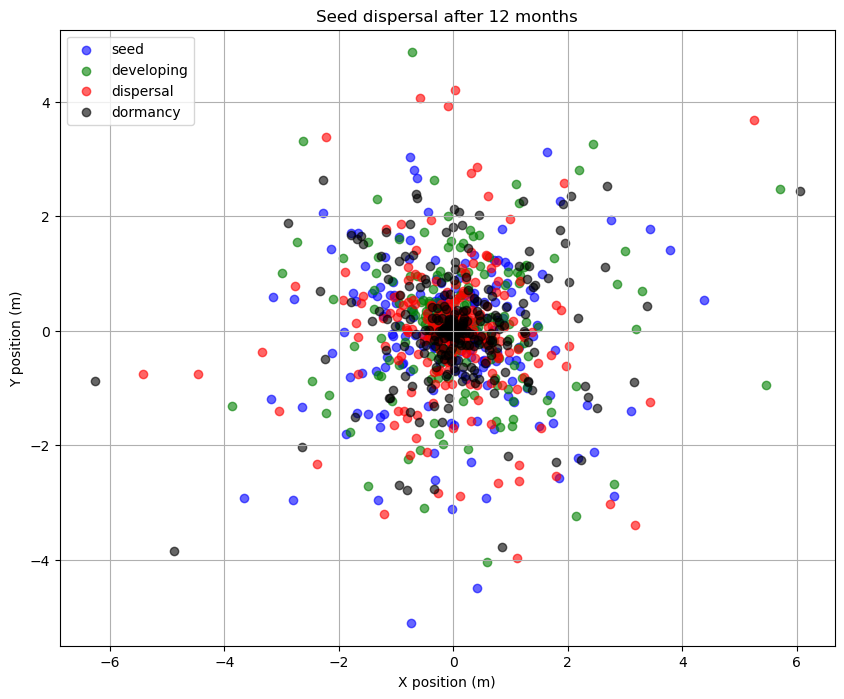

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以重现结果
np.random.seed(0)

# 初始化参数
num_seeds = 1000
initial_position = np.zeros((num_seeds, 2))  # 假设所有种子都从原点开始
wind_speed = 7  # 平均风速，单位：米/秒
wind_direction = np.random.uniform(0, 2*np.pi, num_seeds)  # 风向，从0到2π

# 模拟种子扩散
dispersal_distances = np.random.exponential(scale=1.0, size=num_seeds)  # 假设扩散距离呈指数分布
final_positions = initial_position + dispersal_distances[:, np.newaxis] * np.array([np.cos(wind_direction), np.sin(wind_direction)]).T

# 为不同生命周期阶段分配颜色
# 假设生命周期阶段随机分配（实际应根据环境模型分配）
stages = np.random.choice(['seed', 'developing', 'dispersal', 'dormancy'], size=num_seeds)
colors = {'seed': 'blue', 'developing': 'green', 'dispersal': 'red', 'dormancy': 'black'}

# 绘制结果
plt.figure(figsize=(10, 8))
for stage in ['seed', 'developing', 'dispersal', 'dormancy']:
    mask = stages == stage
    plt.scatter(final_positions[mask, 0], final_positions[mask, 1], c=colors[stage], label=stage, alpha=0.6)

plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.title('Seed dispersal after 12 months')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


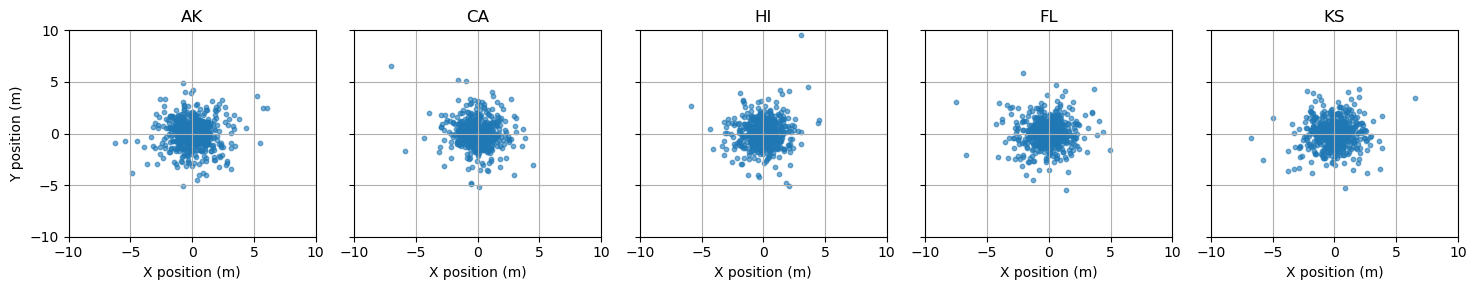

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 环境参数
environments = {
    "AK": {"muW": 7.27, "sigmaW": 1.42},
    "CA": {"muW": 6.02, "sigmaW": 0.90},
    "HI": {"muW": 6.23, "sigmaW": 0.69},
    "FL": {"muW": 6.51, "sigmaW": 1.71},
    "KS": {"muW": 8.58, "sigmaW": 1.55}
}

def simulate_dispersal(num_seeds, muW, sigmaW):
    wind_direction = np.random.uniform(0, 2 * np.pi, num_seeds)
    dispersal_distances = np.random.exponential(scale=1.0, size=num_seeds)
    positions = dispersal_distances[:, np.newaxis] * np.array([np.cos(wind_direction), np.sin(wind_direction)]).T
    return positions

# 设置随机种子以重现结果
np.random.seed(0)
num_seeds = 1000
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

for ax, (state, env) in zip(axes, environments.items()):
    positions = simulate_dispersal(num_seeds, env['muW'], env['sigmaW'])
    ax.scatter(positions[:, 0], positions[:, 1], alpha=0.6, s=10)
    ax.set_title(state)
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.grid(True)
    if ax is axes[0]:
        ax.set_ylabel('Y position (m)')
    ax.set_xlabel('X position (m)')

plt.tight_layout()
plt.show()


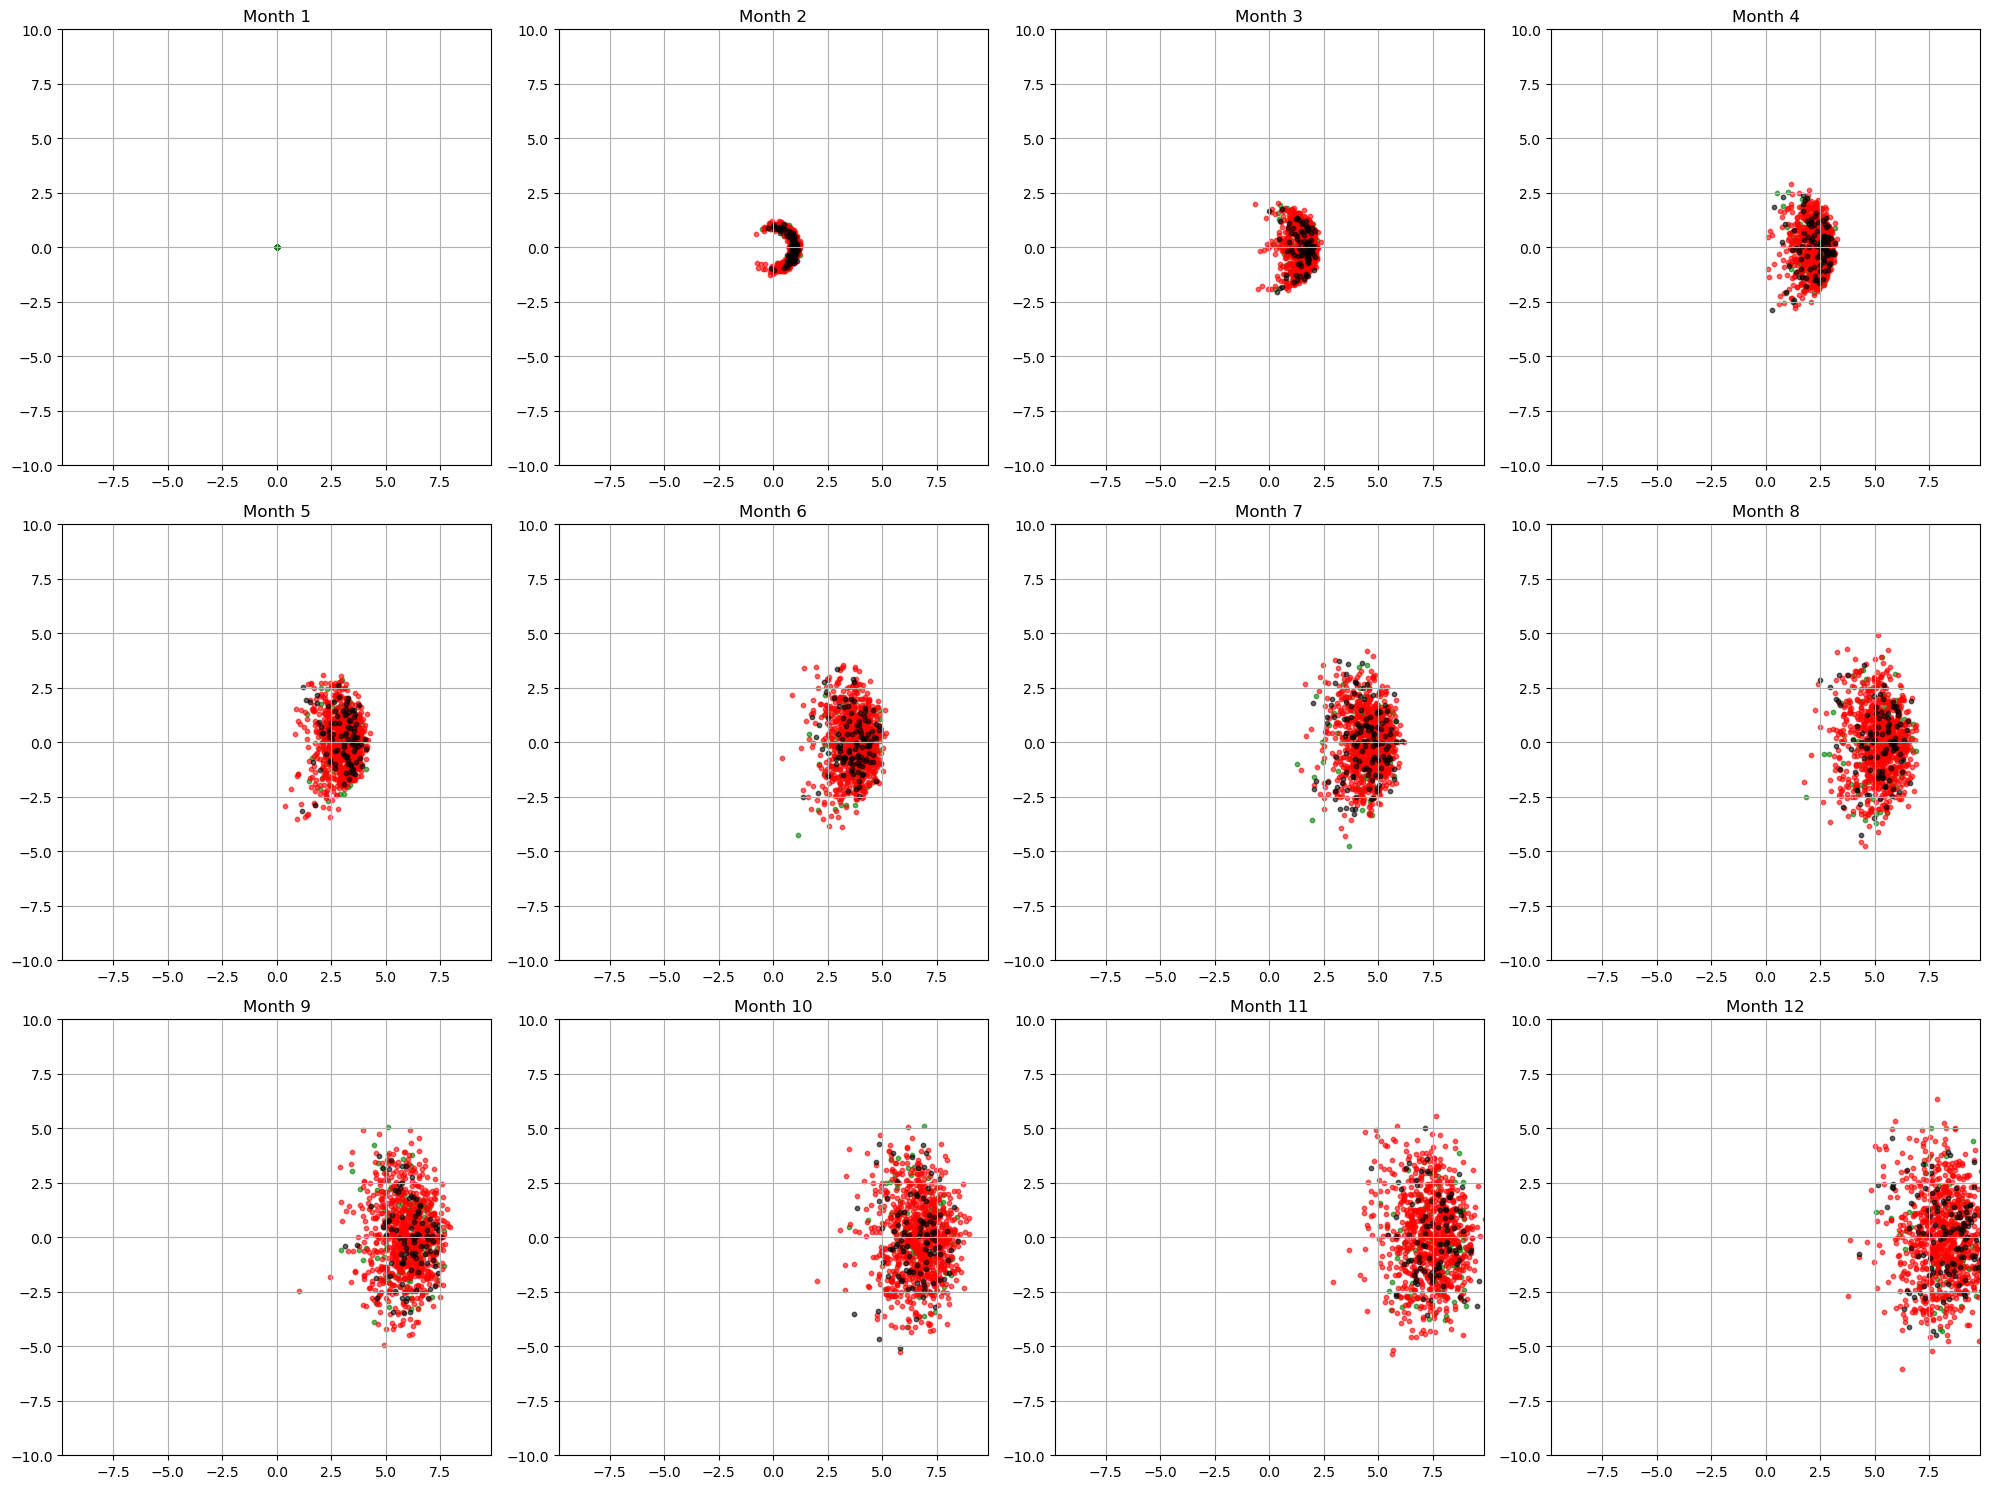

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# 初始化参数
num_seeds = 1000
initial_position = np.zeros((num_seeds, 2))  # 假设所有种子都从中心点开始
wind_speed_mean = 1.0  # 平均风速，单位：米/秒
wind_direction_std = np.pi / 4  # 风向标准差

# 生成每月种子位置的模拟数据
positions = np.zeros((12, num_seeds, 2))
positions[0] = initial_position

# 模拟种子的生命周期状态
stages = np.zeros((12, num_seeds), dtype=int)

# 假设在模拟开始时一半种子处于发育阶段
stages[0, :num_seeds//2] = 1

for month in range(1, 12):
    wind_speed = np.random.normal(wind_speed_mean, 0.1, num_seeds)
    wind_direction = np.random.normal(0, wind_direction_std, num_seeds)
    movement = wind_speed[:, np.newaxis] * np.array([np.cos(wind_direction), np.sin(wind_direction)]).T
    positions[month] = positions[month - 1] + movement
    
    # 更新生命周期状态：随机一些种子进入扩散或休眠状态
    stages[month] = np.random.choice([1, 2, 3], num_seeds, p=[0.1, 0.8, 0.1])

# 绘制结果
colors = ['blue', 'green', 'red', 'black']  # 分别对应种子、发育、扩散、休眠
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # 3行4列的子图
axes = axes.flatten()

for month, ax in enumerate(axes):
    if month < 12:
        for stage, color in enumerate(colors):
            mask = stages[month] == stage
            ax.scatter(positions[month, mask, 0], positions[month, mask, 1], alpha=0.6, s=10, color=color)
        
        ax.set_title(f'Month {month + 1}')
        ax.axis('equal')
        ax.grid(True)
        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])

plt.tight_layout()
plt.show()


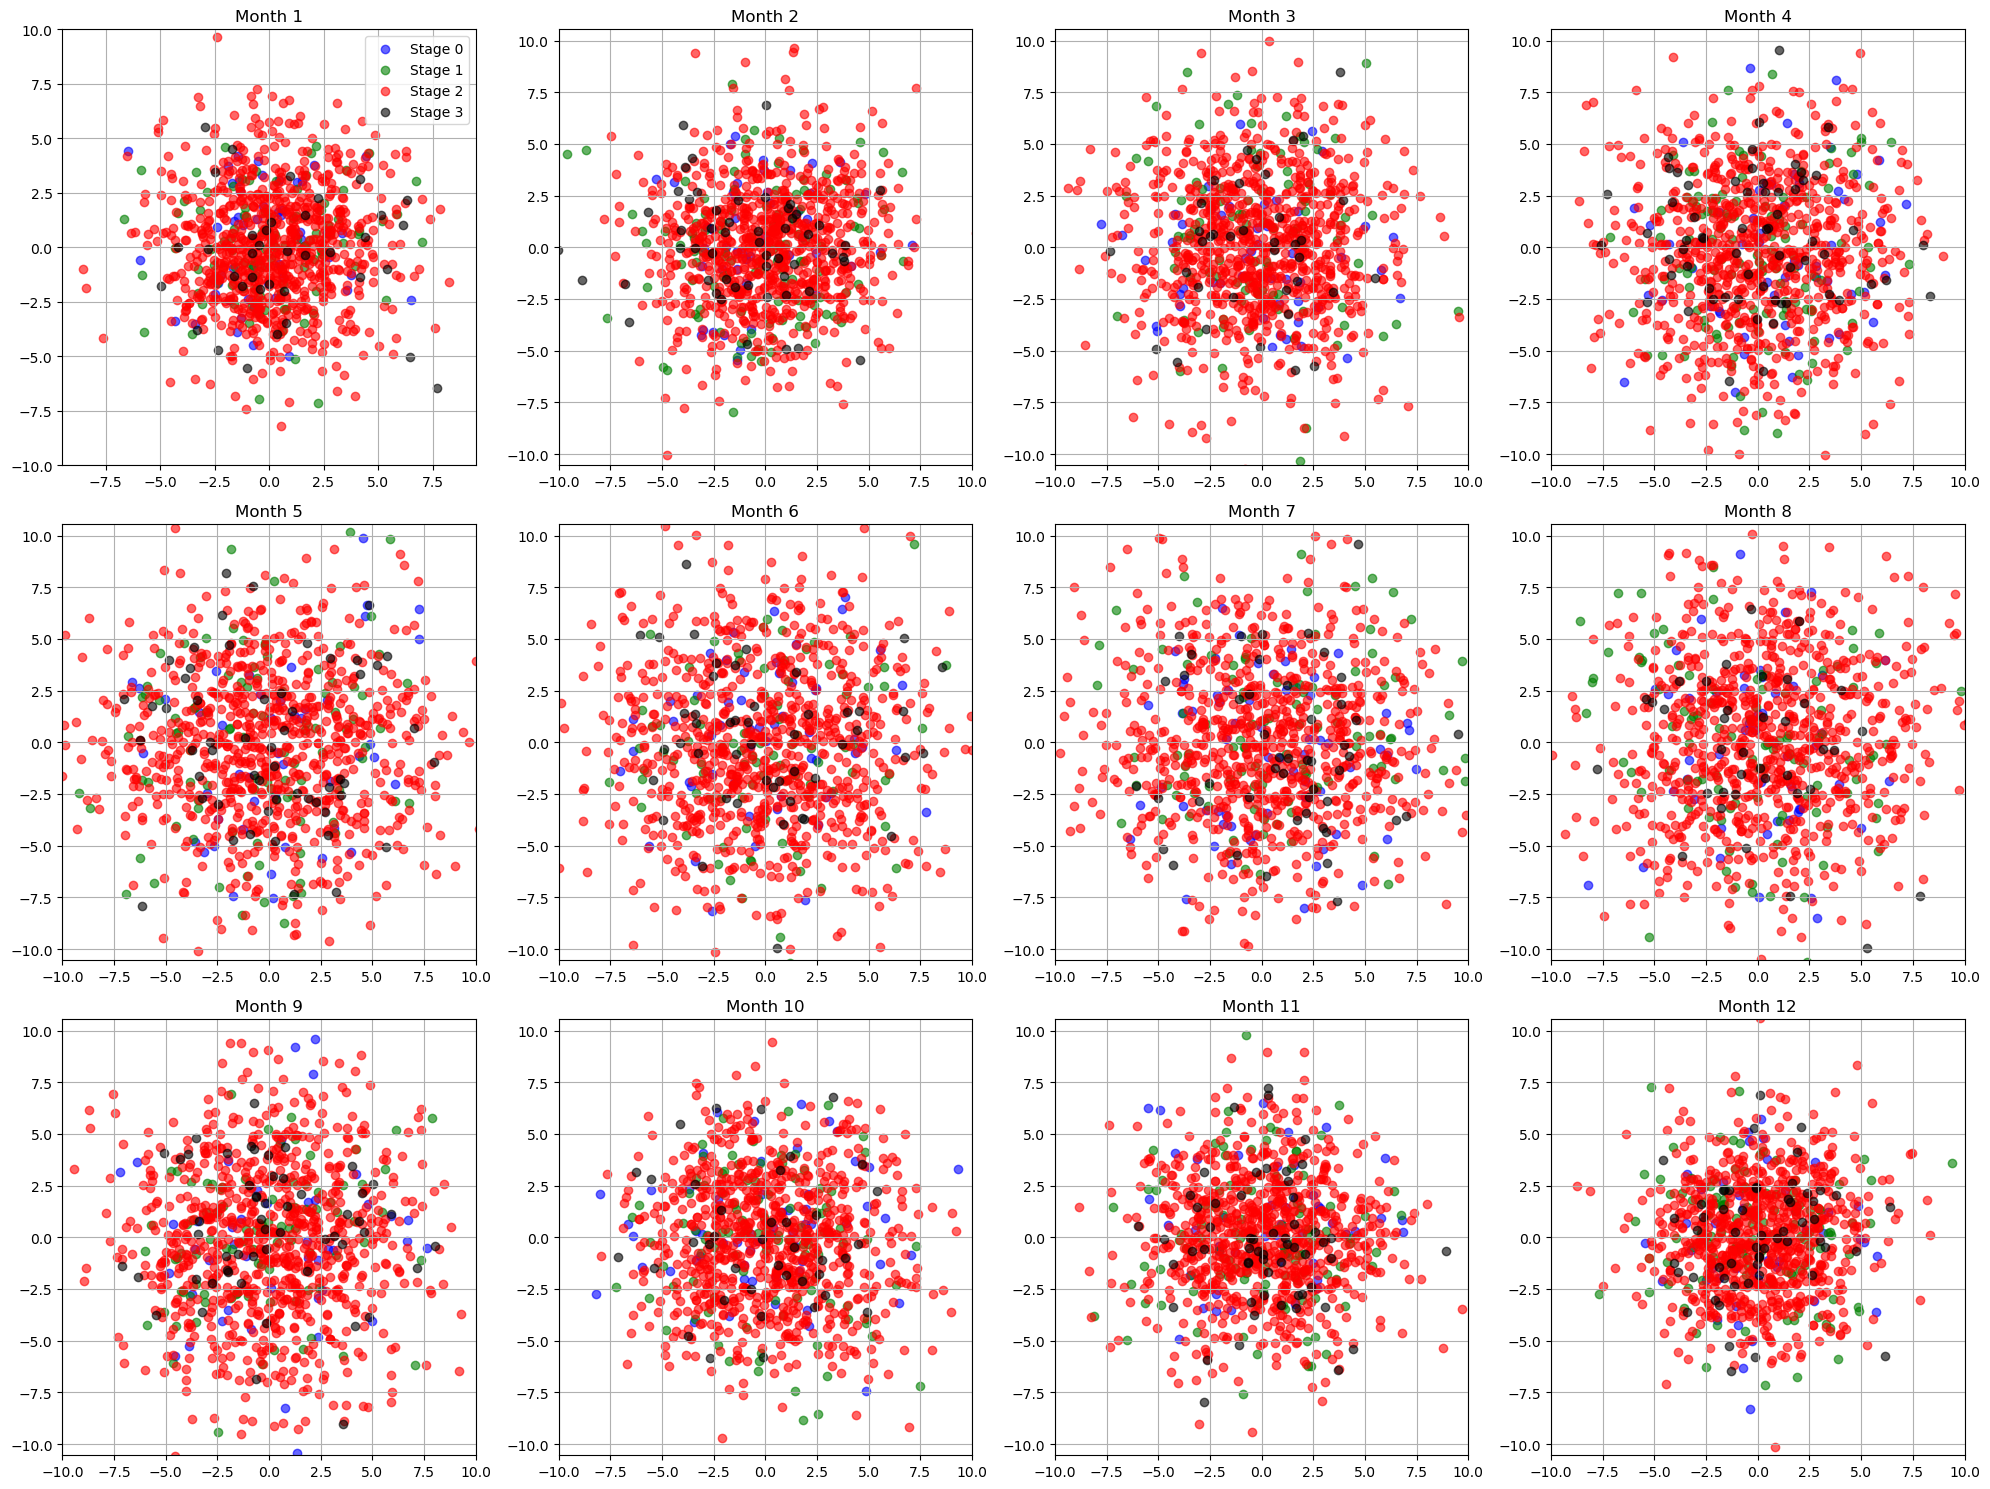

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(A, B, days):
    t = np.arange(days)
    return -A * np.cos(2 * np.pi * t / days) + B

def simulate_dispersal(muW, sigmaW):
    return np.abs(np.random.normal(muW, sigmaW))

def calculate_adaptation_factor(T, T_best=24, T_worst=-10):
    return np.clip((T - T_worst) / (T_best - T_worst), 0, 1)

def simulate_life_cycle(num_seeds, A, B, muW, sigmaW, days=360):
    positions = np.zeros((12, num_seeds, 2))  # 初始化每个月种子的位置
    stages = np.zeros((12, num_seeds), dtype=int)  # 初始化每个月种子的阶段

    T_data = generate_annual_temperatures(A, B, days)
    for day in range(days):
        month = day // 30
        T = T_data[day]
        k = calculate_adaptation_factor(T)
        for seed in range(num_seeds):
            if np.random.rand() < k or np.random.rand() < 0.05:  # 增加低基础活动概率
                dispersal_distance = simulate_dispersal(muW, sigmaW)
                angle = np.random.uniform(0, 2 * np.pi)
                displacement = np.array([np.cos(angle), np.sin(angle)]) * dispersal_distance
                positions[month, seed] += displacement
                stages[month, seed] = np.random.choice([0, 1, 2, 3], p=[0.05, 0.1, 0.8, 0.05])  # 更新种子状态

    return positions, stages

# 参数设定
num_seeds = 1000
A = 10
B = 15
muW = 1.0
sigmaW = 0.1

positions, stages = simulate_life_cycle(num_seeds, A, B, muW, sigmaW)

# 绘图
colors = ['blue', 'green', 'red', 'black']  # 分别对应种子、发育、扩散、休眠
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for month in range(12):
    ax = axes[month]
    for stage, color in enumerate(colors):
        mask = stages[month] == stage
        ax.scatter(positions[month, mask, 0], positions[month, mask, 1], color=color, alpha=0.6, label=f"Stage {stage}" if month == 0 else "")
    ax.set_title(f'Month {month + 1}')
    ax.axis('equal')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.grid(True)
    if month == 0:
        ax.legend()

plt.tight_layout()
plt.show()


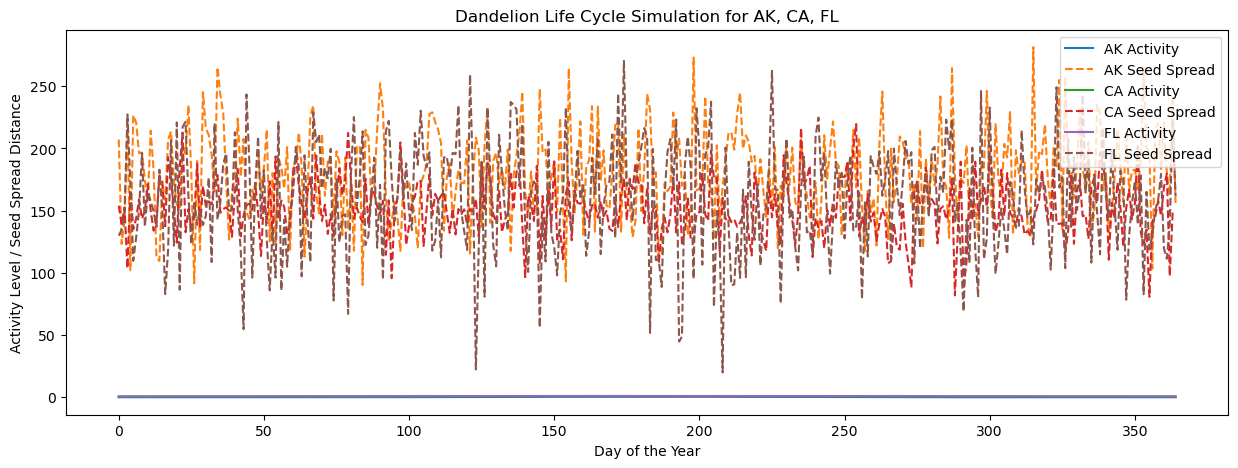

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 环境参数
states = {
    'AK': {'muT': -0.05, 'sigmaT': 9.08, 'muW': 7.27, 'sigmaW': 1.42},
    'CA': {'muT': 16.20, 'sigmaT': 4.99, 'muW': 6.02, 'sigmaW': 0.90},
    'FL': {'muT': 22.11, 'sigmaT': 4.76, 'muW': 6.51, 'sigmaW': 1.71}
}

def adaptation_factor(T, T_worst=0, T_best=24):
    """ Calculate adaptation factor based on temperature """
    if T < T_worst:
        return 0
    elif T > T_best:
        return 1
    else:
        return (T - T_worst) / (T_best - T_worst)

# 模拟每个州的温度和风速
def simulate_environment(days, muT, sigmaT, muW, sigmaW):
    # 使用正弦函数模拟温度
    A = sigmaT
    B = muT
    t = np.arange(0, days)
    temperatures = -A * np.cos(2 * np.pi * t / 365) + B
    
    # 使用正态分布模拟风速
    wind_speeds = np.random.normal(muW, sigmaW, days)
    return temperatures, wind_speeds

# 根据温度和风速模拟蒲公英生活活跃度和种子散布
def simulate_dandelion(days, muT, sigmaT, muW, sigmaW):
    T, W = simulate_environment(days, muT, sigmaT, muW, sigmaW)
    activity = np.array([adaptation_factor(temp) for temp in T])
    spread = (10 / 0.4) * W  
    return activity, spread

# 绘制结果
plt.figure(figsize=(15, 5))
for state, params in states.items():
    activity, spread = simulate_dandelion(365, **params)
    plt.plot(activity, label=f'{state} Activity')
    plt.plot(spread, label=f'{state} Seed Spread', linestyle='--')

plt.xlabel('Day of the Year')
plt.ylabel('Activity Level / Seed Spread Distance')
plt.title('Dandelion Life Cycle Simulation for AK, CA, FL')
plt.legend()
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(A, B, days):
    """生成基于余弦波的年度温度变化"""
    t = np.arange(days)
    return -A * np.cos(2 * np.pi * t / days) + B

def adaptation_factor(T, T_optimal_min=10, T_optimal_max=20, T_max=25):
    """根据温度计算适应因子"""
    if T < T_optimal_min or T > T_max:
        return 0
    elif T > T_optimal_max:
        return 1 - (T - T_optimal_max) / (T_max - T_optimal_max)
    else:
        return 1

def simulate_seed_spread(n, h=10, mu_W=5, sigma_W=2):
    """模拟n个种子的散布"""
    vh = np.random.normal(mu_W, sigma_W, n)  # 水平风速
    sN = (h / 0.4) * vh  # 正常散布距离
    b = -np.log(1 - 0.995) / 10
    sL = np.random.exponential(1/b, n)  # 长距离散布
    return np.maximum(sN, sL)

def simulate_life_cycle(state, days=360, iterations=1000):
    """蒙特卡洛模拟蒲公英生命周期和种子散布"""
    # 设置环境参数
    env_factors = {
        'AK': {'mu_T': -0.05, 'sigma_T': 9.08, 'mu_W': 7.27, 'sigma_W': 1.42},
        'CA': {'mu_T': 16.20, 'sigma_T': 4.99, 'mu_W': 6.02, 'sigma_W': 0.90},
        # 添加其他状态...
    }

    A, B = env_factors[state]['sigma_T'], env_factors[state]['mu_T']
    mu_W, sigma_W = env_factors[state]['mu_W'], env_factors[state]['sigma_W']

    plant_distribution = []

    # 进行模拟
    for _ in range(iterations):
        T_data = generate_annual_temperatures(A, B, days)
        daily_spread = simulate_seed_spread(days, mu_W=mu_W, sigma_W=sigma_W)
        active_stage = np.array([adaptation_factor(temp) for temp in T_data])
        plant_distribution.append(daily_spread * active_stage)

    # 修正索引以兼容数组长度
    monthly_distribution = np.mean(plant_distribution, axis=0)[[29, 89, 179, 269, 359]]  # 分别对应月底
    return monthly_distribution

# 示例调用
results_CA = simulate_life_cycle('CA')
print("植株分布数据 (CA):", results_CA)


植株分布数据 (CA): [150.61105385 150.23136725 114.02106668 149.04728752 150.63287734]


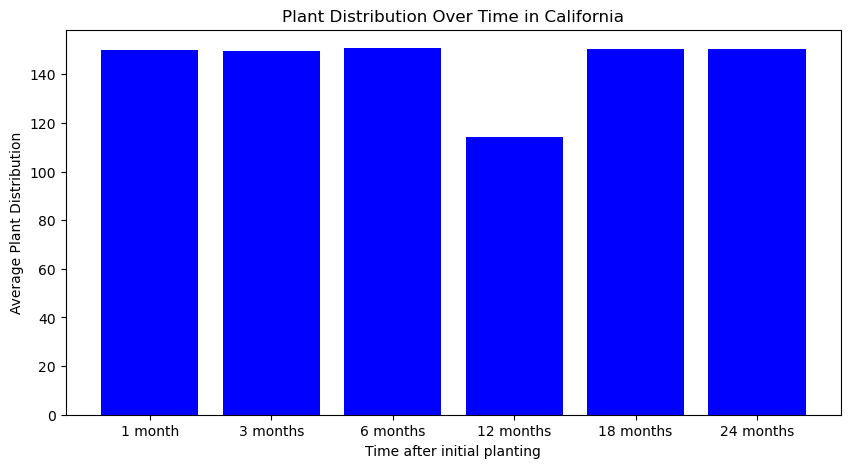

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def generate_annual_temperatures(A, B, days):
    """Generate annual temperature variations using a cosine wave."""
    t = np.arange(days)
    return -A * np.cos(2 * np.pi * t / days) + B

def adaptation_factor(T, T_optimal_min=10, T_optimal_max=20, T_max=25):
    """Calculate adaptation factor based on temperature."""
    if T < T_optimal_min or T > T_max:
        return 0
    elif T > T_optimal_max:
        return 1 - (T - T_optimal_max) / (T_max - T_optimal_max)
    else:
        return 1

def simulate_seed_spread(n, h=10, mu_W=5, sigma_W=2):
    """Simulate the spread of n seeds."""
    vh = np.random.normal(mu_W, sigma_W, n)  # Horizontal wind speed
    sN = (h / 0.4) * vh  # Normal spread distance
    b = -np.log(1 - 0.995) / 10
    sL = np.random.exponential(1/b, n)  # Long distance spread
    return np.maximum(sN, sL)

def simulate_life_cycle(state, days=720, iterations=1000):
    """Monte Carlo simulation of the dandelion lifecycle."""
    env_factors = {
        'AK': {'mu_T': -0.05, 'sigma_T': 9.08, 'mu_W': 7.27, 'sigma_W': 1.42},
        'CA': {'mu_T': 16.20, 'sigma_T': 4.99, 'mu_W': 6.02, 'sigma_W': 0.90},
        # Include other states as needed...
    }

    A, B = env_factors[state]['sigma_T'], env_factors[state]['mu_T']
    mu_W, sigma_W = env_factors[state]['mu_W'], env_factors[state]['sigma_W']

    plant_distribution = []

    for _ in range(iterations):
        T_data = generate_annual_temperatures(A, B, days)
        daily_spread = simulate_seed_spread(days, mu_W=mu_W, sigma_W=sigma_W)
        active_stage = np.array([adaptation_factor(temp) for temp in T_data])
        plant_distribution.append(daily_spread * active_stage)

    monthly_distribution = np.mean(plant_distribution, axis=0)[[29, 89, 179, 359, 539, 719]]  # Corrected indices for specific months
    return monthly_distribution

# Perform simulation for California (CA)
results_CA = simulate_life_cycle('CA')
months = ['1 month', '3 months', '6 months', '12 months', '18 months', '24 months']

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(months, results_CA, color='blue')
plt.xlabel('Time after initial planting')
plt.ylabel('Average Plant Distribution')
plt.title('Plant Distribution Over Time in California')
plt.show()


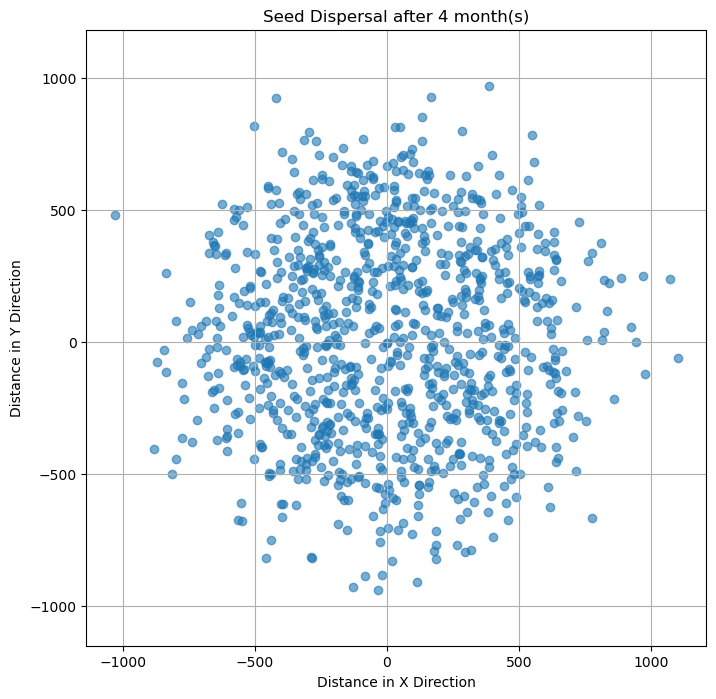

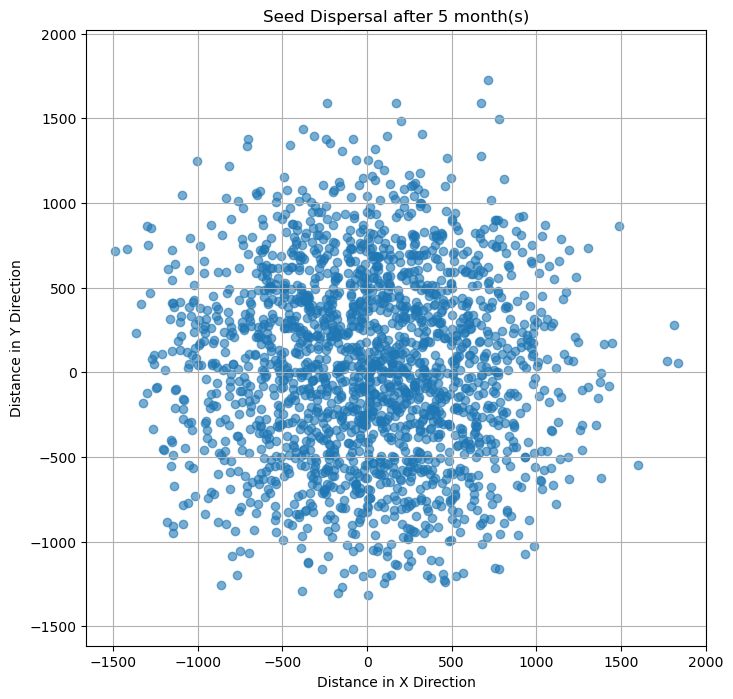

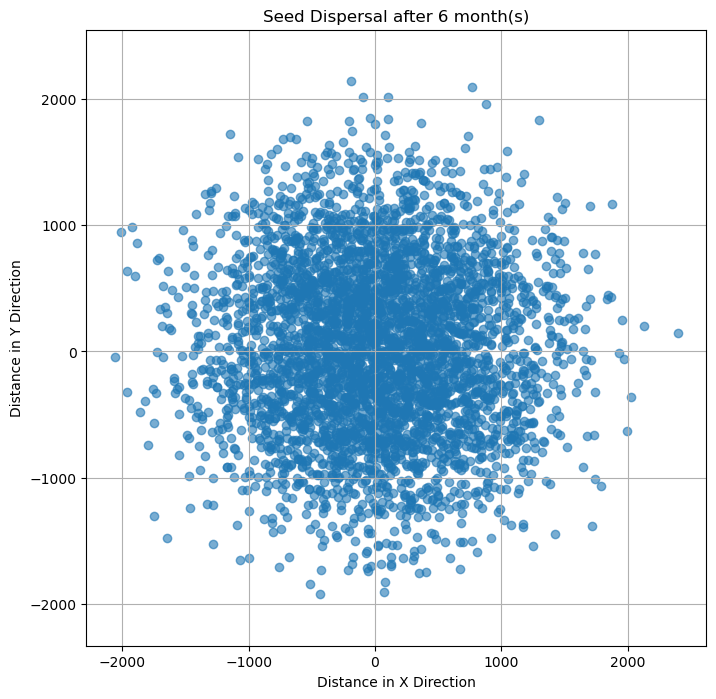

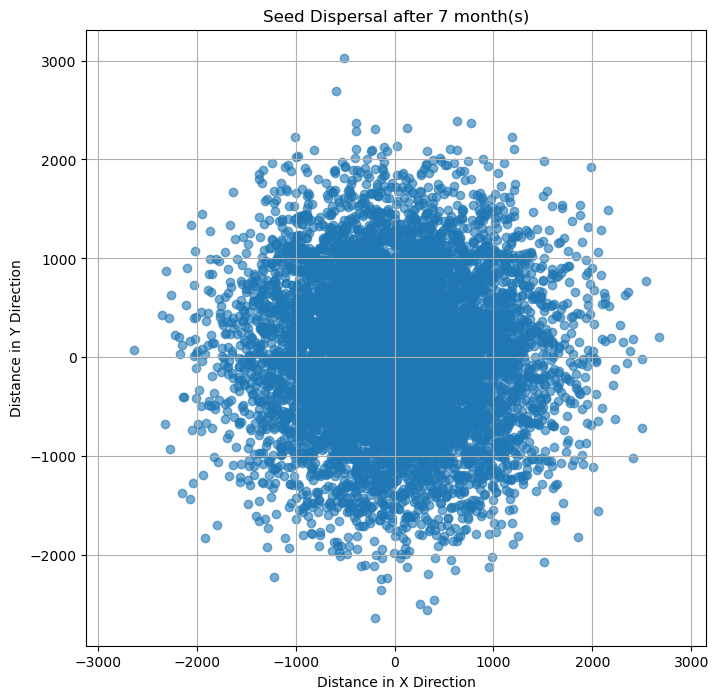

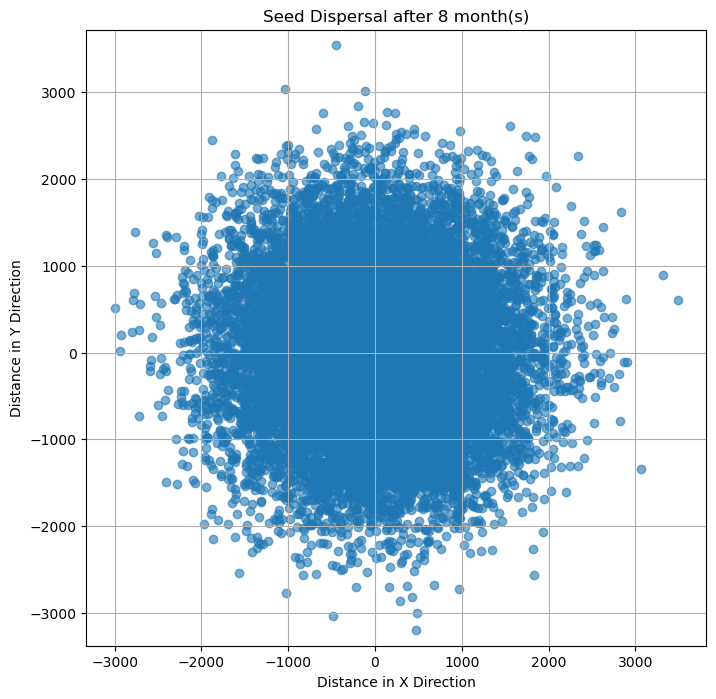

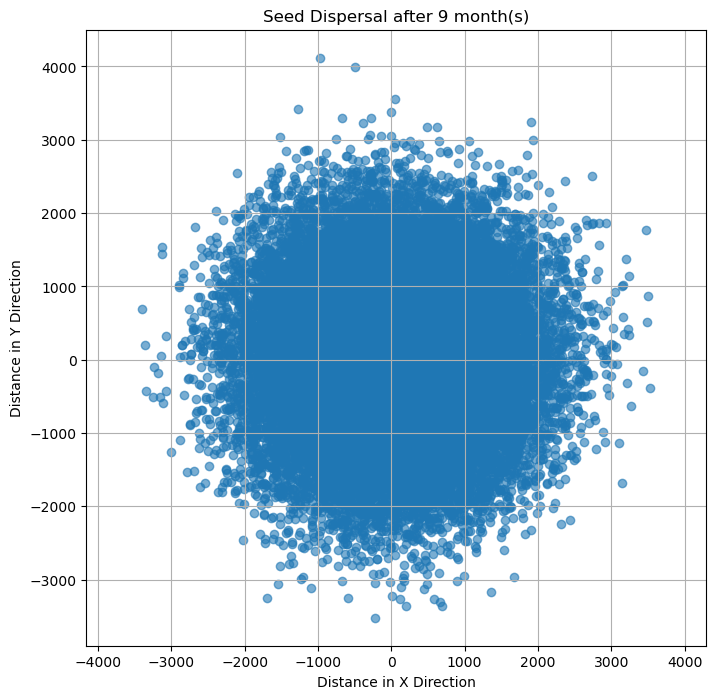

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_wind_effects(n, scale=100):
    """Generate random wind directions and magnitudes."""
    angles = np.random.uniform(0, 2 * np.pi, n)
    magnitudes = np.random.normal(loc=5, scale=2, size=n)  # 正态分布的风速
    x_offsets = magnitudes * np.cos(angles) * scale  # 计算x方向的偏移
    y_offsets = magnitudes * np.sin(angles) * scale  # 计算y方向的偏移
    return x_offsets, y_offsets

def plot_seed_dispersal_by_month(n=1000, months=12, reproduction_rate=0.5):
    """Plot seed dispersal for each month separately, including seasonal growth."""
    # 初始种子位置
    positions = np.zeros((n, 2))
    active_months = set([4, 5, 6, 7, 8, 9])  # 假设4月至9月为蒲公英的活跃生长月份

    for month in range(1, months + 1):
        if month in active_months:
            # 生成这个月的风效应
            x_offsets, y_offsets = generate_wind_effects(len(positions))  # 更新，以当前种子数量生成风效应
            positions += np.column_stack((x_offsets, y_offsets))
        
            # 绘制这个月的散布图
            plt.figure(figsize=(8, 8))
            plt.scatter(positions[:, 0], positions[:, 1], alpha=0.6)
            plt.title(f'Seed Dispersal after {month} month(s)')
            plt.xlabel('Distance in X Direction')
            plt.ylabel('Distance in Y Direction')
            plt.grid(True)
            plt.axis('equal')
            plt.show()
        
            # 模拟种子繁殖，增加新种子
            if reproduction_rate > 0:
                new_seeds = np.random.normal(loc=positions, scale=10, size=positions.shape)  # 假设新种子在原种子周围正态分布生成
                positions = np.vstack((positions, new_seeds))

# 调用函数，进行模拟
plot_seed_dispersal_by_month()


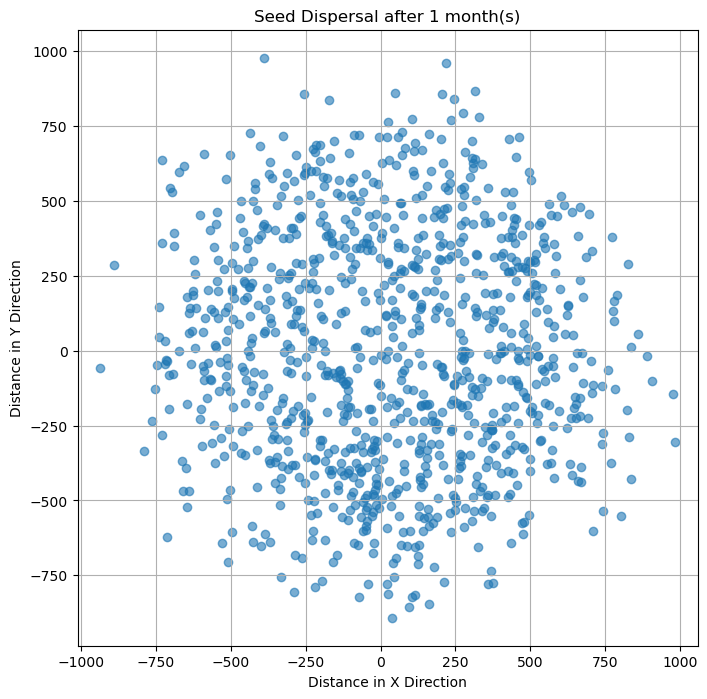

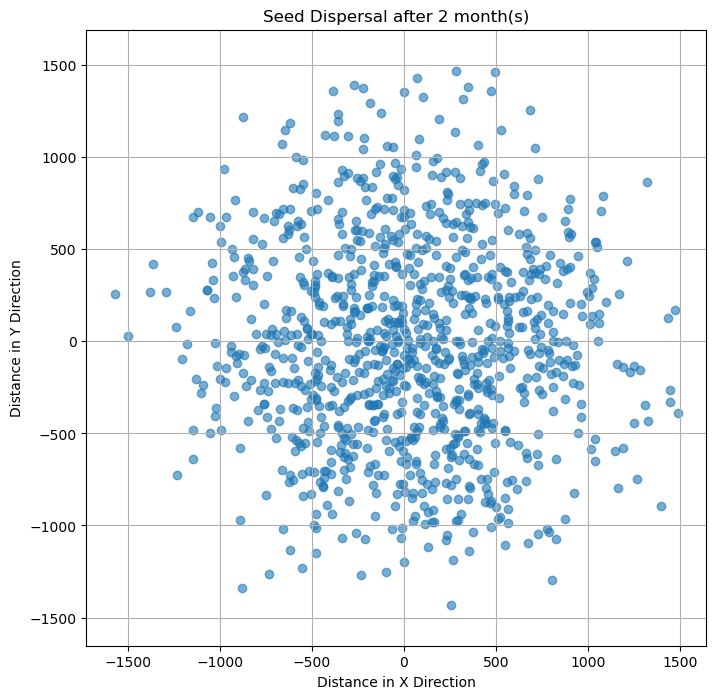

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (500, 2) and arg 1 with shape (1000, 2).

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_wind_effects(n, scale=100):
    """Generate random wind directions and magnitudes."""
    angles = np.random.uniform(0, 2 * np.pi, n)
    magnitudes = np.random.normal(loc=5, scale=2, size=n)  # 正态分布的风速
    x_offsets = magnitudes * np.cos(angles) * scale  # 计算x方向的偏移
    y_offsets = magnitudes * np.sin(angles) * scale  # 计算y方向的偏移
    return x_offsets, y_offsets

def plot_seed_dispersal_by_month(n=1000, months=12, reproduction_rate=0.5):
    """Plot seed dispersal for each month separately, including seasonal growth and decline."""
    # 初始种子位置
    positions = np.zeros((n, 2))
    active_months = set([3, 4, 5, 6, 7, 8, 9])  # 活跃生长月份
    decline_months = set([10, 11])  # 凋亡开始月份
    dormancy_months = set([12, 1, 2])  # 休眠月份

    for month in range(1, months + 1):
        # 生成这个月的风效应
        x_offsets, y_offsets = generate_wind_effects(len(positions))  # 更新，以当前种子数量生成风效应
        positions += np.column_stack((x_offsets, y_offsets))
        
        # 生长、繁殖或凋亡处理
        if month in active_months:
            reproduction_rate = 0.5  # 生长期繁殖率
        elif month in decline_months:
            reproduction_rate = 0.1  # 凋亡期繁殖率
        else:
            reproduction_rate = 0  # 休眠期没有繁殖
        
        # 模拟种子繁殖，增加新种子
        if reproduction_rate > 0:
            new_seeds = np.random.normal(loc=positions, scale=10, size=(int(len(positions) * reproduction_rate), 2))
            positions = np.vstack((positions, new_seeds))
        
        # 绘制这个月的散布图
        plt.figure(figsize=(8, 8))
        plt.scatter(positions[:, 0], positions[:, 1], alpha=0.6)
        plt.title(f'Seed Dispersal after {month} month(s)')
        plt.xlabel('Distance in X Direction')
        plt.ylabel('Distance in Y Direction')
        plt.grid(True)
        plt.axis('equal')
        plt.show()

# 调用函数，进行模拟
plot_seed_dispersal_by_month()
